In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

IMG_DIM = 64
STRIP_WIDTH = 512
STRIP_HEIGHT = 64
SLICE = 2
SNAPS = 8 ##Number of snaps over 4 seconds
# CHANNELS = 1
CHANNELS = 8

In [2]:
_04847_img = np.load('04847-image.npy')
_04799_img = np.load('04799-image.npy')
_04820_img = np.load('04820-image.npy')
_05675_img = np.load('05675-image.npy')
_05680_img = np.load('05680-image.npy')
_05710_img = np.load('05710-image.npy')

_04847_lbl = np.load('04847-label-onehot.npy')
_04799_lbl = np.load('04799-label-onehot.npy')
_04820_lbl = np.load('04820-label-onehot.npy')
_05675_lbl = np.load('05675-label-onehot.npy')
_05680_lbl = np.load('05680-label-onehot.npy')
_05710_lbl = np.load('05710-label-onehot.npy')

# train_img = np.vstack((_04847_img, _04799_img, _04820_img, _05675_img, _05680_img))
# train_lbl = np.vstack((_04847_lbl, _04799_lbl, _04820_lbl, _05675_lbl, _05680_lbl))

# val_img = _05710_img
# val_lbl = _05710_lbl

train_img = np.vstack((_04847_img, _04799_img, _04820_img, _05675_img, _05710_img))
train_lbl = np.vstack((_04847_lbl, _04799_lbl, _04820_lbl, _05675_lbl, _05710_lbl))

val_img = _05680_img
val_lbl = _05680_lbl

### Trying to overfit
# val_img = _05680_img
# val_lbl = _05680_lbl

In [3]:
print train_img.shape
print train_lbl.shape
print val_img.shape
print val_lbl.shape


(3200, 64, 64, 8)
(3200, 2)
(640, 64, 64, 8)
(640, 2)


In [4]:
train_snapshots = train_img.shape[0]
val_snapshots = val_img.shape[0]

train_lbl = train_lbl[np.arange(0,train_snapshots,SNAPS)]
val_lbl = val_lbl[np.arange(0,val_snapshots,SNAPS)]

### Generate brain slices collected over 4 seconds

In [5]:
num_train_slices = train_img.shape[0]/SNAPS
# concat_train_img = train_img[:,:,:,SLICE]
concat_train_img = train_img[:,:,:,:]
concat_train_img = concat_train_img.reshape(num_train_slices,IMG_DIM*SNAPS,IMG_DIM, CHANNELS)
print concat_train_img.shape

(400, 512, 64, 8)


In [6]:
num_val_slices = val_img.shape[0]/SNAPS
# concat_val_img = val_img[:,:,:,SLICE]
concat_val_img = val_img[:,:,:,:]
concat_val_img = concat_val_img.reshape(num_val_slices,IMG_DIM*SNAPS,IMG_DIM, CHANNELS)
print concat_val_img.shape

(80, 512, 64, 8)


In [7]:
print concat_train_img.shape
print train_lbl.shape
print concat_val_img.shape
print val_lbl.shape

(400, 512, 64, 8)
(400, 2)
(80, 512, 64, 8)
(80, 2)


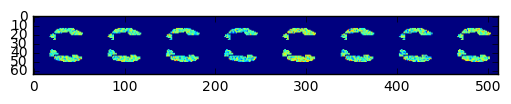

[ 1.  0.]


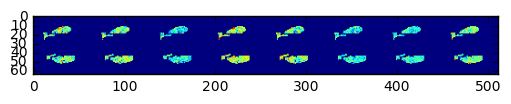

[ 0.  1.]


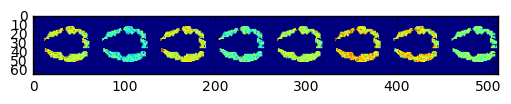

[ 1.  0.]


In [8]:
for i in range(3):
    rand_i = np.random.randint(num_train_slices)
    plt.show(plt.imshow(concat_train_img[rand_i,:,:,7].T))
    print train_lbl[rand_i]

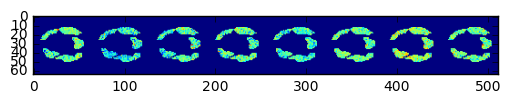

[ 0.  1.]


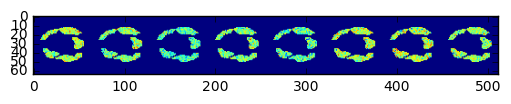

[ 0.  1.]


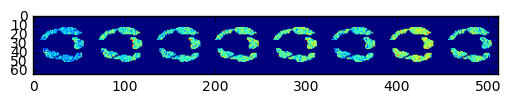

[ 1.  0.]


In [9]:
for i in range(3):
    rand_i = np.random.randint(num_val_slices)
    plt.show(plt.imshow(concat_val_img[rand_i,:,:,7].T))
    print val_lbl[rand_i]

### Visualizing the slices (Just for sanity check) <i>ugly coding just for cross-check</i>

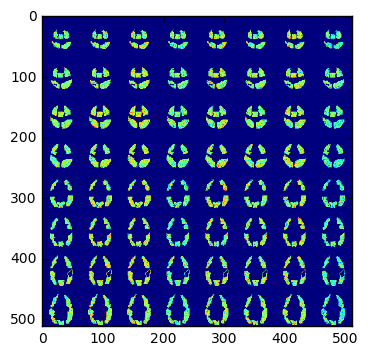

In [10]:
image_col = np.hstack((train_img[0,:,:,0],train_img[1,:,:,0],
                       train_img[2,:,:,0],train_img[3,:,:,0],
                       train_img[4,:,:,0],train_img[5,:,:,0],
                       train_img[6,:,:,0],train_img[7,:,:,0]))
image_col2 = np.hstack((train_img[0,:,:,1],train_img[1,:,:,1],
                       train_img[2,:,:,1],train_img[3,:,:,1],
                       train_img[4,:,:,1],train_img[5,:,:,1],
                       train_img[6,:,:,1],train_img[7,:,:,1]))
image_col3 = np.hstack((train_img[0,:,:,2],train_img[1,:,:,2],
                       train_img[2,:,:,2],train_img[3,:,:,2],
                       train_img[4,:,:,2],train_img[5,:,:,2],
                       train_img[6,:,:,2],train_img[7,:,:,2]))
image_col4 = np.hstack((train_img[0,:,:,3],train_img[1,:,:,3],
                       train_img[2,:,:,3],train_img[3,:,:,3],
                       train_img[4,:,:,3],train_img[5,:,:,3],
                       train_img[6,:,:,3],train_img[7,:,:,3]))
image_col5 = np.hstack((train_img[0,:,:,4],train_img[1,:,:,4],
                       train_img[2,:,:,4],train_img[3,:,:,4],
                       train_img[4,:,:,4],train_img[5,:,:,4],
                       train_img[6,:,:,4],train_img[7,:,:,4]))
image_col6 = np.hstack((train_img[0,:,:,5],train_img[1,:,:,5],
                       train_img[2,:,:,5],train_img[3,:,:,5],
                       train_img[4,:,:,5],train_img[5,:,:,5],
                       train_img[6,:,:,5],train_img[7,:,:,5]))
image_col7 = np.hstack((train_img[0,:,:,6],train_img[1,:,:,6],
                       train_img[2,:,:,6],train_img[3,:,:,6],
                       train_img[4,:,:,6],train_img[5,:,:,6],
                       train_img[6,:,:,6],train_img[7,:,:,6]))
image_col8 = np.hstack((train_img[0,:,:,7],train_img[1,:,:,7],
                       train_img[2,:,:,7],train_img[3,:,:,7],
                       train_img[4,:,:,7],train_img[5,:,:,7],
                       train_img[6,:,:,7],train_img[7,:,:,7]))

image = np.vstack((image_col, image_col2, image_col3, image_col4,
                  image_col5, image_col6, image_col7, image_col8))
plt.show(plt.imshow(image))

In [11]:
def next_batch(X, y, size):
    perm = np.random.permutation(X.shape[0])
    for i in np.arange(0, X.shape[0], size):
        yield (X[perm[i:i + size]], y[perm[i:i + size]])


def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial, name='W')


def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial, name='b')


def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')


def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                          strides=[1, 2, 2, 1], padding='SAME')


def loss_accuracy(cross_entropy_count, accuracy_count, x, y_, keep_prob, phase_train, X, Y, batch_size):
    c, l = 0, 0
    for batch_xs, batch_ys in next_batch(X, Y, batch_size):
        feed_dict = {x: batch_xs, y_: batch_ys, keep_prob: 1.0, phase_train: False}
        l += cross_entropy_count.eval(feed_dict=feed_dict)
        c += accuracy_count.eval(feed_dict=feed_dict)
    return l / Y.shape[0], c / Y.shape[0]

In [12]:
def batch_norm(x, n_out, phase_train):
    """
    Batch normalization on convolutional maps.
    Ref.: http://stackoverflow.com/questions/33949786/how-could-i-use-batch-normalization-in-tensorflow
    Args:
        x:           Tensor, 4D BHWD input maps
        n_out:       integer, depth of input maps
        phase_train: boolean tf.Varialbe, true indicates training phase
        scope:       string, variable scope
    Return:
        normed:      batch-normalized maps
    """
    with tf.variable_scope('bn'):
        beta = tf.Variable(tf.constant(0.0, shape=[n_out]), name='beta', trainable=True)
        gamma = tf.Variable(tf.constant(1.0, shape=[n_out]), name='gamma', trainable=True)
        batch_mean, batch_var = tf.nn.moments(x, [0,1,2], name='moments')
        ema = tf.train.ExponentialMovingAverage(decay=0.6)

        def mean_var_with_update():
            ema_apply_op = ema.apply([batch_mean, batch_var])
            with tf.control_dependencies([ema_apply_op]):
                return tf.identity(batch_mean), tf.identity(batch_var)

        mean, var = tf.cond(phase_train,
                            mean_var_with_update,
                            lambda: (ema.average(batch_mean), ema.average(batch_var)))
        normed = tf.nn.batch_normalization(x, mean, var, beta, gamma, 1e-2)
    return normed

In [13]:
x = tf.placeholder(tf.float32, shape=[None, STRIP_WIDTH, STRIP_HEIGHT, CHANNELS], name='x')
y_ = tf.placeholder(tf.float32, shape=[None, 2], name='y_')
phase_train = tf.placeholder(tf.bool, name='phase_train')

# 3x3 patch, 1 channel, 32 output channels
W_conv1 = weight_variable([5, 5, CHANNELS, 32])
b_conv1 = bias_variable([32])

x_image = tf.reshape(x, [-1, STRIP_WIDTH, STRIP_HEIGHT, CHANNELS])

h_conv1 = conv2d(x_image, W_conv1) + b_conv1
h_conv1 = tf.nn.relu(batch_norm(h_conv1, 32, phase_train))
h_pool1 = max_pool_2x2(h_conv1)

# 3x3 patch, 32 input channels, 64 output channels
W_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])

h_conv2 = conv2d(h_pool1, W_conv2) + b_conv2
h_conv2 = tf.nn.relu(batch_norm(h_conv2, 64, phase_train))
h_pool2 = max_pool_2x2(h_conv2)

# Fully connected layer 
W_fc1 = weight_variable([16 * 128 * 64, 1024])
b_fc1 = bias_variable([1024])

h_pool2_flat = tf.reshape(h_pool2, [-1, 16 * 128 * 64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

W_fc2 = weight_variable([1024, 512])
b_fc2 = bias_variable([512])

keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

h_fc2 = tf.nn.relu(tf.matmul(h_fc1_drop, W_fc2) + b_fc2)

W_fc3 = weight_variable([512, 2])
b_fc3 = bias_variable([2])

y_conv = tf.matmul(h_fc2, W_fc3) + b_fc3

In [14]:
max_epochs = 80
learning_rate = 1e-4
step, train_acc_arr, train_loss_arr, val_acc_arr, val_loss_arr = 0, [], [], [], []

cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y_conv))
cross_entropy_count = tf.reduce_sum(tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y_conv))

train_step = tf.train.AdamOptimizer(learning_rate).minimize(cross_entropy)

correct_prediction = tf.equal(tf.argmax(y_conv, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
accuracy_count = tf.reduce_sum(tf.cast(correct_prediction, tf.float32))

In [15]:
sess = tf.InteractiveSession()
writer = tf.summary.FileWriter('/tmp/brain/1')
writer.add_graph(sess.graph)

sess.run(tf.global_variables_initializer())
for i in range(max_epochs):
    print "Epoch: {}".format(i)
    for batch_xs, batch_ys in next_batch(concat_train_img, train_lbl, 10):
        train_step.run(feed_dict={x: batch_xs, y_: batch_ys, keep_prob: 1.0, phase_train: True})

        step += 1
        if step % 100 == 0:
            train_loss, train_accuracy = loss_accuracy(cross_entropy_count, accuracy_count,
                                                       x, y_, keep_prob, phase_train,
                                                       concat_train_img, train_lbl, 100)
            val_loss, val_accuracy = loss_accuracy(cross_entropy_count, accuracy_count,
                                                   x, y_, keep_prob, phase_train,
                                                   concat_val_img, val_lbl, 100)
         
            train_acc_arr.append(train_accuracy)
            train_loss_arr.append(train_loss)
            
            val_acc_arr.append(val_accuracy)
            val_loss_arr.append(val_loss)
            
            print "step %d, train accuracy %.4f, train loss %.5f, val accuracy %g, val loss %g" % (
                step, train_accuracy, train_loss, val_accuracy, val_loss)

Epoch: 0
Epoch: 1
Epoch: 2
step 100, train accuracy 0.5600, train loss 11.70521, val accuracy 0.4875, val loss 16.6251
Epoch: 3
Epoch: 4
step 200, train accuracy 0.5350, train loss 16.40033, val accuracy 0.55, val loss 5.45259
Epoch: 5
Epoch: 6
Epoch: 7
step 300, train accuracy 0.7275, train loss 2.90158, val accuracy 0.5375, val loss 5.3302
Epoch: 8
Epoch: 9
step 400, train accuracy 0.6650, train loss 5.18349, val accuracy 0.5, val loss 11.549
Epoch: 10
Epoch: 11
Epoch: 12
step 500, train accuracy 0.5000, train loss 19.25719, val accuracy 0.5, val loss 30.5922
Epoch: 13
Epoch: 14
step 600, train accuracy 0.8575, train loss 1.65382, val accuracy 0.5, val loss 5.02555
Epoch: 15
Epoch: 16
Epoch: 17
step 700, train accuracy 0.7175, train loss 2.54026, val accuracy 0.4875, val loss 11.6156
Epoch: 18
Epoch: 19
step 800, train accuracy 0.9025, train loss 0.48225, val accuracy 0.5, val loss 11.7435
Epoch: 20
Epoch: 21
Epoch: 22
step 900, train accuracy 0.6700, train loss 4.33966, val accuracy

In [ ]:
test_loss, test_accuracy = loss_accuracy(cross_entropy_count, accuracy_count,
                                         x, y_, keep_prob, phase_train,
                                         concat_val_img, val_lbl, 100)
print 'Val Accuracy: %g, Val Loss: %g' % (test_accuracy * 100, test_loss)